In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("Foreign_Exchange_Rates3.csv")
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [3]:
newColumnsNames = list(map(lambda c: c.split(" - ")[0] if "-" in c else "DATE", df.columns))
newColumnsNames
df.columns = newColumnsNames
df.head()

,DATE,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG KONG,INDIA,...,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND
0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [4]:
# Fill ND values with previous and next values
df = df.replace("ND", np.nan)
df = df.bfill().ffill() 
df.tail(15)

,DATE,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG KONG,INDIA,...,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND
5531,10-11-2020,1.3751,0.8469,1.4826,0.7553,4.019,1.2962,6.9618,7.7894,74.2433,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5532,11-11-2020,1.3745,0.8499,1.4826,0.7559,4.019,1.2962,6.9618,7.7894,74.4195,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5533,12-11-2020,1.3793,0.8481,1.4826,0.7613,4.019,1.2962,6.9618,7.7894,74.6892,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5534,13-11-2020,1.3796,0.8464,1.4826,0.7591,4.019,1.2962,6.9618,7.7894,74.639,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5535,14-11-2020,1.3796,0.8464,1.4826,0.7591,4.019,1.2962,6.9618,7.7894,74.639,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5536,15-11-2020,1.3796,0.8464,1.4826,0.7591,4.019,1.2962,6.9618,7.7894,74.639,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5537,16-11-2020,1.3716,0.8453,1.4826,0.7592,4.019,1.2962,6.9618,7.7894,74.4544,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5538,17-11-2020,1.3664,0.8416,1.4826,0.754,4.019,1.2962,6.9618,7.7894,74.4677,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5539,18-11-2020,1.3672,0.8426,1.4826,0.7531,4.019,1.2962,6.9618,7.7894,74.1582,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5540,19-11-2020,1.3753,0.8452,1.4826,0.7554,4.019,1.2962,6.9618,7.7894,74.203,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75


In [5]:
# Make date wise indexing 
df = df.set_index("DATE")
df.index = pd.to_datetime(df.index,dayfirst=True)
df = df.astype(float)
df.head()

,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG KONG,INDIA,KOREA,...,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [6]:
print("Total number of records", len(df))
print("Total number of days between {} and {} are {}".format(df.index.min().date(), df.index.max().date(), (df.index.max() - df.index.min()).days+1))

Total number of records 5546
Total number of days between 2000-01-03 and 2020-11-24 are 7632


In [7]:
# Prepare a full dataframe
num_records = 7632
data = {}
data["DATE"] = pd.date_range("2000-01-03", "2020-11-24", freq="D",)

complete = pd.DataFrame(data=data)
complete = complete.set_index("DATE")
complete = complete.merge(df, left_index=True, right_index=True, how="left")
complete = complete.bfill().ffill()

In [8]:
complete.head()

,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG KONG,INDIA,KOREA,...,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [9]:
sampled2d = complete.resample("2D").mean()
print(sampled2d)

            AUSTRALIA  EURO AREA  NEW ZEALAND  UNITED KINGDOM   BRAZIL  \
DATE                                                                     
2000-01-03    1.52055    0.97735      1.91355         0.61275  1.82275   
2000-01-05    1.52790    0.96810      1.93875         0.60810  1.84800   
2000-01-07    1.52570    0.97340      1.93650         0.61055  1.82500   
2000-01-09    1.52420    0.97540      1.93500         0.61070  1.81900   
2000-01-11    1.52055    0.97075      1.93255         0.60705  1.82875   
...               ...        ...          ...             ...      ...   
2020-11-15    1.37560    0.84585      1.48260         0.75915  4.01900   
2020-11-17    1.36680    0.84210      1.48260         0.75355  4.01900   
2020-11-19    1.37160    0.84410      1.48260         0.75445  4.01900   
2020-11-21    1.36790    0.84300      1.48260         0.75350  4.01900   
2020-11-23    1.36365    0.84155      1.48260         0.74855  4.01900   

             CANADA    CHINA  HONG KO

In [10]:
def getTimeSeriesData(A, window=7):
    X, y = list(), list()
    for i in range(len(A)):
        end_ix = i + window
        if end_ix > len(A) - 1:
            break
        seq_x, seq_y = A[i:end_ix], A[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [11]:
window = 7
num_features = 1

X, y = getTimeSeriesData(list(complete["EURO AREA"]), window=window)
print("X:", X.shape)
print("Y:", y.shape)

# We need to add one more dimension to X, i.e Num of features in 1 sample of time step. as we are doing a univariate prediction which means number of features are 1 only
X = X.reshape((X.shape[0], X.shape[1], num_features))  # For LSTM
print("-----------")
print("X:", X.shape)
print("Y:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("-----------")
print("X train:", X_train.shape)
print("y train:", y_train.shape)
print("X test:", X_test.shape)
print("y test:", y_test.shape)

X: (7625, 7)
Y: (7625,)
-----------
X: (7625, 7, 1)
Y: (7625,)
-----------
X train: (6862, 7, 1)
y train: (6862,)
X test: (763, 7, 1)
y test: (763,)


In [12]:
# Define Model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(window, num_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
215/215 [==============================] - 6s 26ms/step - loss: 0.0365 - accuracy: 0.0000e+00
Epoch 2/50
215/215 [==============================] - 6s 27ms/step - loss: 8.6442e-05 - accuracy: 0.0000e+00- ETA: 2s - los
Epoch 3/50
215/215 [==============================] - 6s 27ms/step - loss: 8.2553e-05 - accuracy: 0.0000e+00
Epoch 4/50
215/215 [==============================] - 6s 26ms/step - loss: 8.3141e-05 - accuracy: 0.0000e+00 1s - loss: 8.3823e-05 - ac - ETA
Epoch 5/50
215/215 [==============================] - 6s 27ms/step - loss: 8.4627e-05 - accuracy: 0.0000e+00 1s - loss: 8.4258e-05 -  - ETA: 0s - loss: 8.4529e-0
Epoch 6/50
215/215 [==============================] - 6s 29ms/step - loss: 8.6512e-05 - accuracy: 0.0000e+00
Epoch 7/50
215/215 [==============================] - 7s 34ms/step - loss: 8.2192e-05 - accuracy: 0.0000e+00 1s - loss: 8.3 - ETA: 0s - loss: 8.2890e-05 - accuracy:  - ETA: 0s - loss: 8.2239e-05 - accuracy: 0.0000e+
Epoch 8/50
215/215 [=============

In [13]:
print(history.history)

{'loss': [0.03652353212237358, 8.644183981232345e-05, 8.255326974904165e-05, 8.314093429362401e-05, 8.462713594781235e-05, 8.651227108202875e-05, 8.219206938520074e-05, 8.344880188815296e-05, 8.243925549322739e-05, 8.220155723392963e-05, 7.892567373346537e-05, 7.892134453868493e-05, 7.739529974060133e-05, 8.004464325495064e-05, 7.08642037352547e-05, 6.622316868742928e-05, 7.385529897874221e-05, 6.940753519302234e-05, 6.915271660545841e-05, 7.095118780853227e-05, 6.604656664421782e-05, 7.034769078018144e-05, 7.127801654860377e-05, 7.54796783439815e-05, 6.555359141202644e-05, 6.996989395702258e-05, 7.020884368102998e-05, 6.984927313169464e-05, 6.141624908195809e-05, 7.39908282412216e-05, 7.026003731880337e-05, 6.82905811117962e-05, 5.878811498405412e-05, 6.783546996302903e-05, 6.321704131551087e-05, 6.436350668082014e-05, 5.97348807787057e-05, 6.472451059380546e-05, 6.322691478999332e-05, 5.801632869406603e-05, 5.834783223690465e-05, 5.7334498706040904e-05, 5.5688524298602715e-05, 5.7940

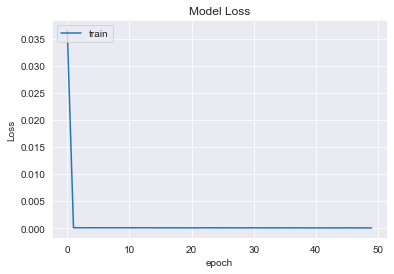

In [14]:
plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
yPred = model.predict(X_test, verbose=0)
print(yPred[0:10])
yPred.shape = yPred.shape[0]

[[0.8531157 ]
 [0.7598311 ]
 [1.1131    ]
 [0.75267595]
 [0.7297617 ]
 [0.84592146]
 [0.76309556]
 [1.1551596 ]
 [0.9217906 ]
 [0.88121957]]


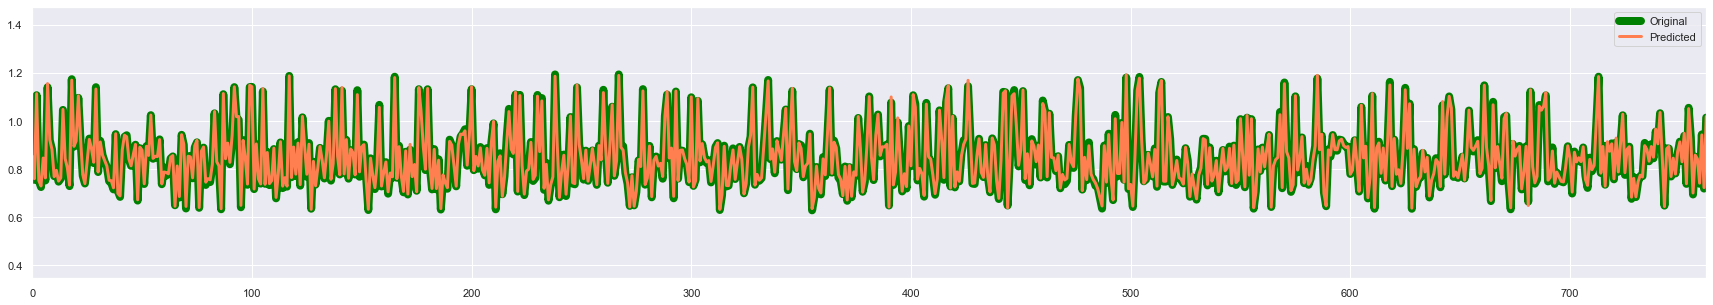

In [16]:
plt.figure(figsize=(30,5))
sns.set(rc={"lines.linewidth": 8})
sns.lineplot(x=np.arange(y_test.shape[0]), y=y_test, color="green")
sns.set(rc={"lines.linewidth": 3})
sns.lineplot(x=np.arange(y_test.shape[0]), y=yPred, color="coral")
plt.margins(x=0, y=0.5)
plt.legend(["Original", "Predicted"])

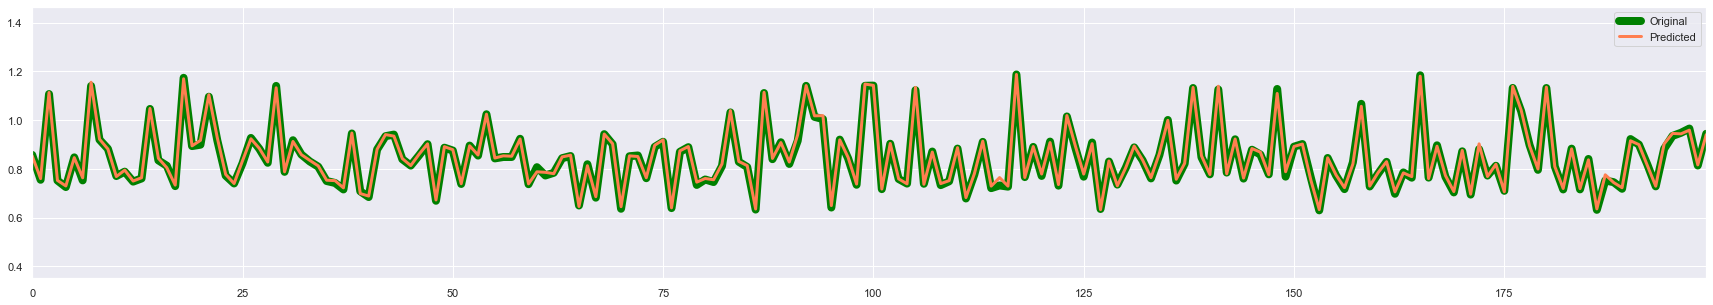

In [17]:
points = 200
plt.figure(figsize=(30,5))
sns.set(rc={"lines.linewidth": 8})
sns.lineplot(x=np.arange(points), y=y_test[:points], color="green")
sns.set(rc={"lines.linewidth": 3})
sns.lineplot(x=np.arange(points), y=yPred[:points], color="coral")
plt.margins(x=0, y=0.5)
plt.legend(["Original", "Predicted"])

In [18]:
def predict_rates(day1,day2,day3,day4,day5,day6,day7,x):
    i=0
    my_x = np.zeros((1,7,1))
    my_x[0][i][0] = day1
    i+=1
    my_x[0][i][0] = day2
    i+=1
    my_x[0][i][0] = day3
    i+=1
    my_x[0][i][0] = day4
    i+=1
    my_x[0][i][0] = day5
    i+=1
    my_x[0][i][0] = day6
    i+=1
    my_x[0][i][0] = day7
    i+=1
    for j in range(x):
        yPred = model.predict(my_x, verbose=0)
        print("Predicted cost for day {} is {}".format(j+1,yPred[0][0]))
        print(j)
        for s in range(6):
            my_x[0][s][0] = my_x[0][s+1][0]
        my_x[0][6][0] = yPred[0][0]
        print(my_x)
        
    

In [19]:
predict_rates(1.1152,1.1077,1.1082,1.1109,1.1153,1.1206,1.1264,5)

Predicted cost for day 1 is 1.1206891536712646
0
[[[1.1077    ]
  [1.1082    ]
  [1.1109    ]
  [1.1153    ]
  [1.1206    ]
  [1.1264    ]
  [1.12068915]]]
Predicted cost for day 2 is 1.1213369369506836
1
[[[1.1082    ]
  [1.1109    ]
  [1.1153    ]
  [1.1206    ]
  [1.1264    ]
  [1.12068915]
  [1.12133694]]]
Predicted cost for day 3 is 1.1227651834487915
2
[[[1.1109    ]
  [1.1153    ]
  [1.1206    ]
  [1.1264    ]
  [1.12068915]
  [1.12133694]
  [1.12276518]]]
Predicted cost for day 4 is 1.1243696212768555
3
[[[1.1153    ]
  [1.1206    ]
  [1.1264    ]
  [1.12068915]
  [1.12133694]
  [1.12276518]
  [1.12436962]]]
Predicted cost for day 5 is 1.125907301902771
4
[[[1.1206    ]
  [1.1264    ]
  [1.12068915]
  [1.12133694]
  [1.12276518]
  [1.12436962]
  [1.1259073 ]]]


In [ ]:
# serialize to JSON
json_file = model.to_json()
with open("./EURUSD", "w") as file:
    file.write(json_file)
# serialize weights to HDF5
model.save_weights("EURUSDweights.h5")

In [ ]:
from keras.models import model_from_json
# load json and create model
file = open("EURUSD", 'r')
model_json = file.read()
file.close()
loaded_model = model_from_json(model_json)
# load weights
loaded_model.load_weights("EURUSDweights.h5")

In [ ]:
def predict_rates(day1,day2,day3,day4,day5,day6,day7,x):
    i=0
    my_x = np.zeros((1,7,1))
    my_x[0][i][0] = day1
    i+=1
    my_x[0][i][0] = day2
    i+=1
    my_x[0][i][0] = day3
    i+=1
    my_x[0][i][0] = day4
    i+=1
    my_x[0][i][0] = day5
    i+=1
    my_x[0][i][0] = day6
    i+=1
    my_x[0][i][0] = day7
    i+=1
    for j in range(x):
        yPred = loaded_model.predict(my_x, verbose=0)
        print("Predicted cost for day {} is {}".format(j+1,yPred[0][0]))
        print(j)
        for s in range(6):
            my_x[0][s][0] = my_x[0][s+1][0]
        my_x[0][6][0] = yPred[0][0]
        print(my_x)
    

In [ ]:
predict_rates(1.1152,1.1077,1.1082,1.1109,1.1153,1.1206,1.1264,5)